<a href="https://colab.research.google.com/github/lizamericasanchezgutierrezdemarca/lizamericasanchezgutierrezdemarca/blob/main/limpieza_datos_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hola bienvenido  a mi mini proyecto de limpieza de datos, esto es lo que suelo usar cuando  toca hacer limpieza de datos dependiendo mucho del tipo de base que se tenga y los objetivos que solicitie el cliente.


# 🧼 Limpieza de Datos - Titanic Dataset
Este notebook muestra un ejemplo de limpieza de datos usando Python y Pandas.
- Dataset: Titanic (de Kaggle o Seaborn)
- Objetivo: dejar los datos listos para un modelo de predicción.

In [ ]:
# 🔧 Cargar librerías
import pandas as pd
import seaborn as sns
import missingno as msno

In [ ]:
# 📥 Cargar datos
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
# 🔍 Verificar valores nulos
df.isnull().sum()

,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


<Axes: >

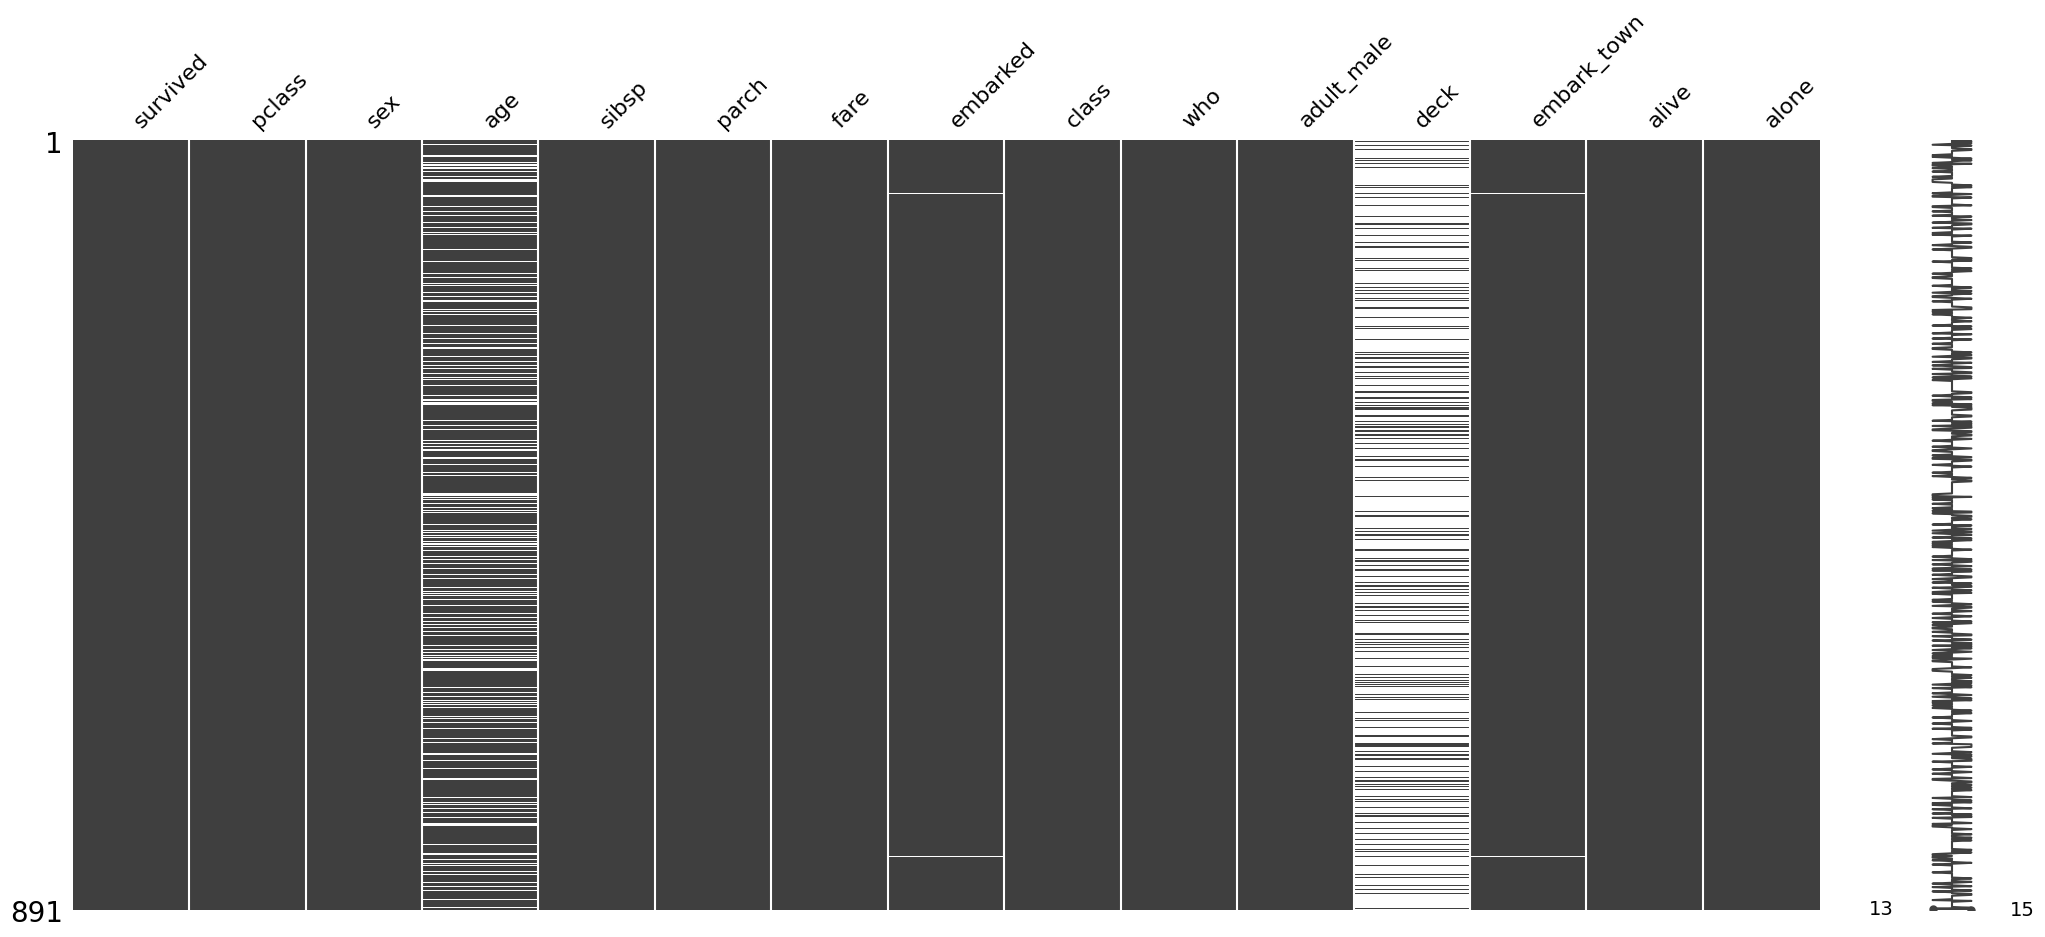

In [ ]:
# 🔍 Visualizar valores nulos
msno.matrix(df)

In [ ]:
# 🧽 Eliminar columnas con muchos nulos
df.drop(columns=['deck'], inplace=True)  # demasiados nulos

In [ ]:
# 🧼 Imputar valores nulos
df['age'].fillna(df['age'].median(), inplace=True)
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

<ipython-input-6-5ca48df9af5b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(), inplace=True)
<ipython-input-6-5ca48df9af5b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# 🔄 Codificar variables categóricas
df = pd.get_dummies(df, columns=['sex', 'embarked', 'class'], drop_first=True)
df.head()

,survived,pclass,age,sibsp,parch,fare,who,adult_male,embark_town,alive,alone,sex_male,embarked_Q,embarked_S,class_Second,class_Third
0,0,3,22.0,1,0,7.2500,man,True,Southampton,no,False,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,woman,False,Cherbourg,yes,False,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,woman,False,Southampton,yes,True,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,woman,False,Southampton,yes,False,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,man,True,Southampton,no,True,True,False,True,False,True
